In [176]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [117]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [118]:
X.shape

(100, 5)

Generating a dummy data

In [137]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.844757,-1.881368,-1.483304,-1.092243,-1.024084,1
1,-0.714115,-1.898633,1.598485,-1.366552,1.516281,0
2,-0.758965,-0.225359,0.478454,-0.032351,-0.284103,0
3,-1.401852,-0.900139,-0.818749,-0.622100,-1.104504,1
4,-1.454178,-0.409107,-1.008059,-1.143903,-0.027453,1


# Subdatasets generating functions

In [138]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [165]:
def feature_sampling(df, percent):

  np.random.seed()
  num_columns_to_sample = int(df.shape[1] * percent)
  sampled_columns = np.random.choice(df.columns, num_columns_to_sample, replace=False)
  sampled_subset = df[sampled_columns].copy()
  sampled_subset['target'] = df['target'].copy()

  return sampled_subset




In [191]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return feature_sampling(new_df,col_percent)

# Training decision tree using row_sampling

In [139]:
df1 = sample_rows(df, 0.2)
df1.sample(10)

,col1,col2,col3,col4,col5,target
17,-3.084913,-0.258665,2.200864,-4.894426,-1.068495,1
20,-0.278122,-2.113927,-1.798015,-0.300548,-1.372524,1
17,-3.084913,-0.258665,2.200864,-4.894426,-1.068495,1
36,0.323238,-1.715822,-1.437425,-0.177396,-1.499529,1
73,-3.731177,-0.470746,0.413039,-0.810573,-1.575581,1
98,0.445722,1.054455,1.542859,-1.182866,-1.937155,0
81,0.039396,-2.343189,-0.083938,-0.254919,0.324927,0
31,-1.089320,-0.481541,-1.919985,-0.435688,0.528279,1
16,-0.177498,-3.194786,1.081823,-2.062408,0.043319,0
76,-2.999229,-4.770228,-2.092709,2.020989,2.297006,0


In [140]:
df2 = sample_rows(df, 0.2)
df2.sample(10)


,col1,col2,col3,col4,col5,target
60,-3.953841,-0.409107,0.787993,-0.258489,-2.933087,1
46,-0.248477,-2.036656,-2.322134,1.460707,-1.393916,1
53,-0.437297,-1.506639,0.928887,-0.993383,-0.176370,0
89,-1.123642,-1.650980,-0.129005,0.798562,2.267409,0
75,-0.885399,-1.321504,-1.638134,-0.914317,0.094564,1
41,0.923773,-1.378370,0.560786,-1.103673,-1.729217,0
31,-1.089320,-0.481541,-1.919985,-0.435688,0.528279,1
15,-0.849962,-2.018365,0.599065,-0.700111,1.130243,0
21,-1.194954,-0.618397,-1.977186,-0.463499,-1.276419,1
47,-0.517598,0.732807,0.905664,-1.229819,0.248123,0


In [141]:
df3 = sample_rows(df, 0.2)
df3.sample(10)

,col1,col2,col3,col4,col5,target
54,-2.347207,-2.222028,-2.065842,2.500316,1.291803,0
79,-0.188692,-2.183463,1.839360,-2.699440,-0.079772,0
27,-1.783768,-0.217844,-1.654268,-0.107569,-1.078395,1
21,-1.194954,-0.618397,-1.977186,-0.463499,-1.276419,1
45,-1.459546,0.176775,-0.937337,-1.804981,-0.403569,1
11,-3.133303,1.639952,1.072309,-3.735110,-0.752731,1
93,0.687386,0.630027,1.623666,-2.318428,-1.420760,0
35,-0.107123,-0.799266,-0.117618,-3.119893,-0.859644,1
65,-3.376695,0.074535,1.537129,-2.226158,-2.993201,1
97,-1.301131,-0.493348,1.133284,-1.140275,0.409886,0


In [142]:
df1.shape

(20, 6)

In [143]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [144]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.209\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.5, 'x[2] <= -2.022\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.5, 'x[0] <= -2.695\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

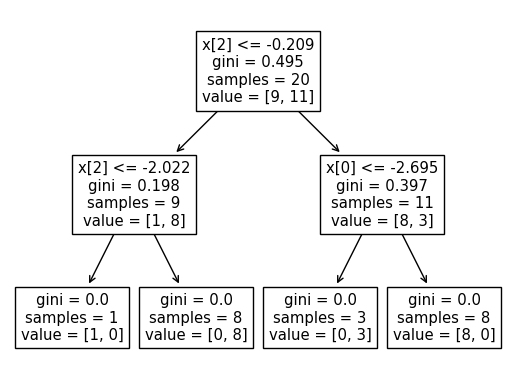

In [145]:
plot_tree(clf1)

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.218\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.5, 'x[0] <= -2.367\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.5, 'x[0] <= -2.909\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

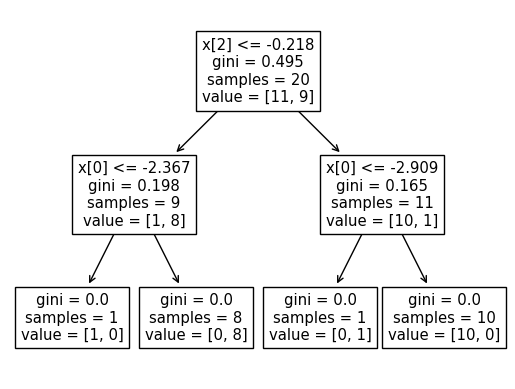

In [146]:
plot_tree(clf2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.343\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.5, 'x[1] <= -0.878\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.5, 'x[0] <= -2.878\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

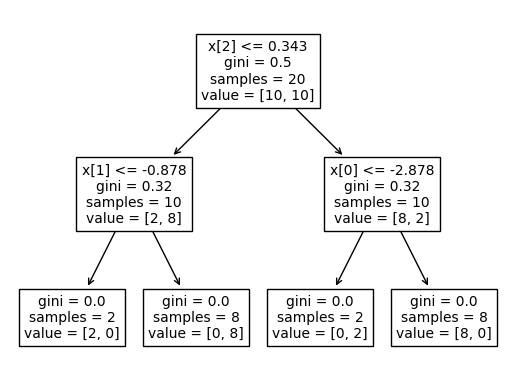

In [147]:
plot_tree(clf3)

# Combining all above steps into one function for row_sampling

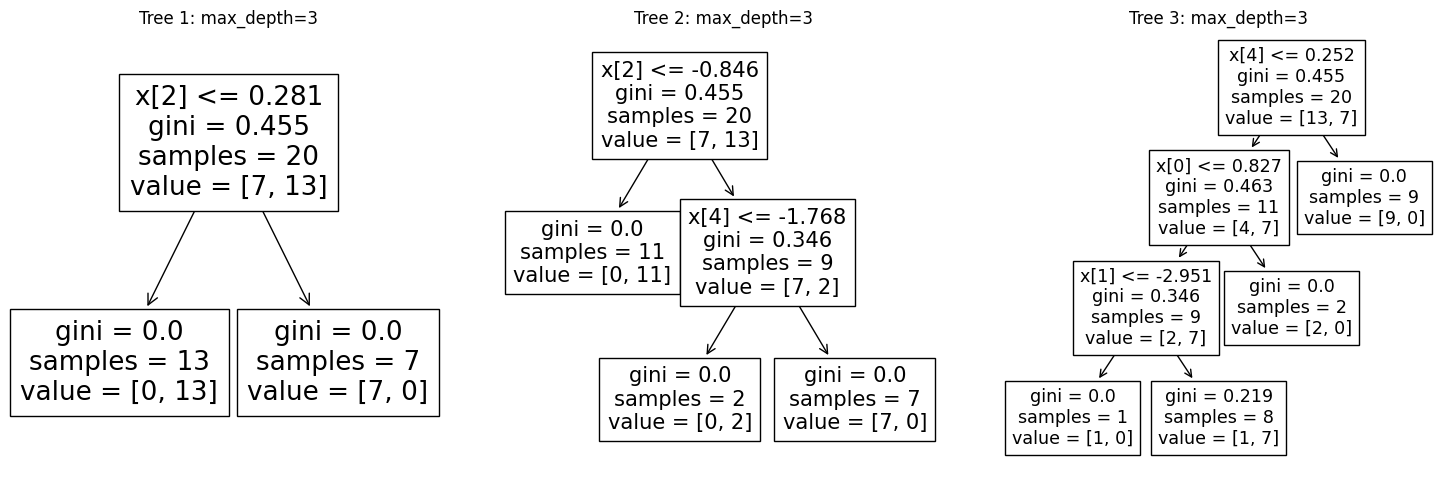

In [148]:


def plot_trees(df, percent, num_trees=3):
    fig, axes = plt.subplots(nrows=1, ncols=num_trees, figsize=(5*num_trees, 5))
    fig.tight_layout()

    for i in range(num_trees):
        train_data = sample_rows(df, percent)  # Assuming sample_rows is defined elsewhere
        X_train = train_data.drop('target', axis=1)
        y_train = train_data['target']

        tree = DecisionTreeClassifier(max_depth=3)
        tree.fit(X_train, y_train)

        plot_tree(tree, ax=axes[i])
        axes[i].set_title(f'Tree {i+1}: max_depth=3')

    plt.show()

# Example usage:
# df is your original DataFrame
# percent is the percentage of rows to sample (e.g., 0.2 for 20%)
# num_trees is the number of decision trees to plot
plot_trees(df, 0.2, num_trees=3)

# Training decision tree using column_sampling

In [225]:
df1_fs = feature_sampling(df, 0.8)
df1_fs.sample(10)

,col3,col4,col2,target
65,1.537129,-2.226158,0.074535,1
99,1.385014,-2.090782,-4.512779,0
10,0.113598,-0.384733,-0.795832,1
56,-0.801739,-1.221374,-1.526387,1
87,-0.271967,1.674260,-0.332257,0
24,-1.463507,-0.832894,-0.428511,1
68,2.275841,-2.970662,-1.951392,0
26,1.211865,-1.452400,1.323543,0
55,-1.949286,0.115096,-1.705999,1
46,-2.322134,1.460707,-2.036656,1


In [226]:
df2_fs = feature_sampling(df, 0.8)
df2_fs.sample(10)

,col5,col2,col1,target
90,0.489554,1.668562,-1.863788,0
5,1.643804,-0.356664,-1.561841,0
81,0.324927,-2.343189,0.039396,0
93,-1.420760,0.630027,0.687386,0
49,1.673648,-0.313186,0.159965,1
44,0.182498,-1.334562,-0.053825,0
27,-1.078395,-0.217844,-1.783768,1
66,-1.155625,-1.793075,0.806634,1
53,-0.176370,-1.506639,-0.437297,0
25,0.972269,0.065078,-2.623338,0


In [227]:
df3_fs = feature_sampling(df, 0.8)
df3_fs.sample(10)

,col3,col1,col2,col5,target
96,-0.681861,-1.023545,-0.334664,-0.989066,1
69,-1.193180,0.266702,-0.731601,0.304723,1
87,-0.271967,-2.904086,-0.332257,3.892637,0
52,2.548371,0.061420,0.632154,0.662538,0
27,-1.654268,-1.783768,-0.217844,-1.078395,1
76,-2.092709,-2.999229,-4.770228,2.297006,0
91,1.563138,-1.439659,-1.496834,-3.963703,1
95,-1.208007,-0.882262,-0.252914,-1.111420,1
75,-1.638134,-0.885399,-1.321504,0.094564,1
11,1.072309,-3.133303,1.639952,-0.752731,1


In [228]:
df3_fs.shape

(100, 5)

In [229]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [230]:
clf1.fit(df1_fs.iloc[:,0:4],df1_fs['target'])
clf2.fit(df2_fs.iloc[:,0:4],df2_fs['target'])
clf3.fit(df3_fs.iloc[:,0:4],df3_fs['target'])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

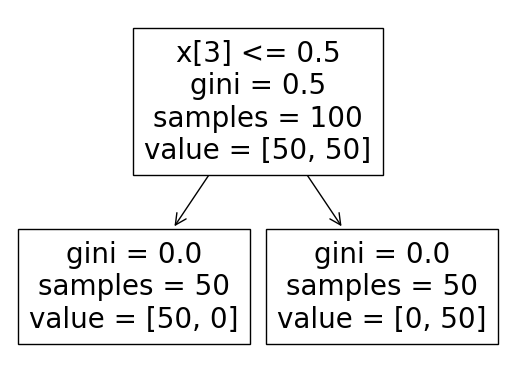

In [183]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

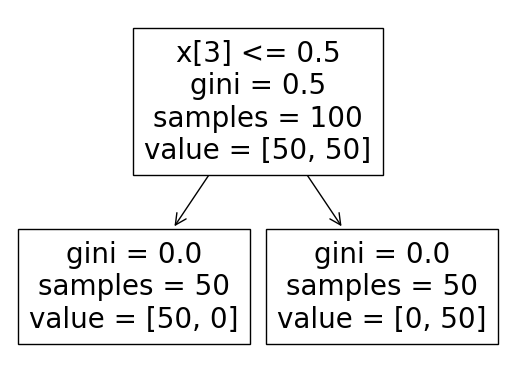

In [173]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

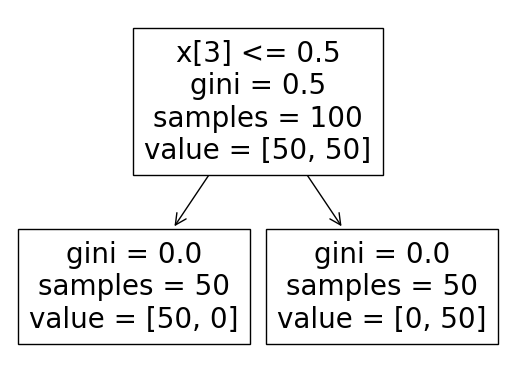

In [174]:
plot_tree(clf3)

# All the trees given different number of columns

In [175]:
print(df1_fs.columns)
print(df2_fs.columns)
print(df3_fs.columns)

Index(['col3', 'col1', 'col5', 'target'], dtype='object')
Index(['col4', 'col1', 'col3', 'target'], dtype='object')
Index(['col2', 'col4', 'col3', 'target'], dtype='object')


In [232]:
predicted = clf3.predict(np.array([-2.092709,	-2.999229,	-4.770228,	2.297006]).reshape(1,-1))
print(predicted)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


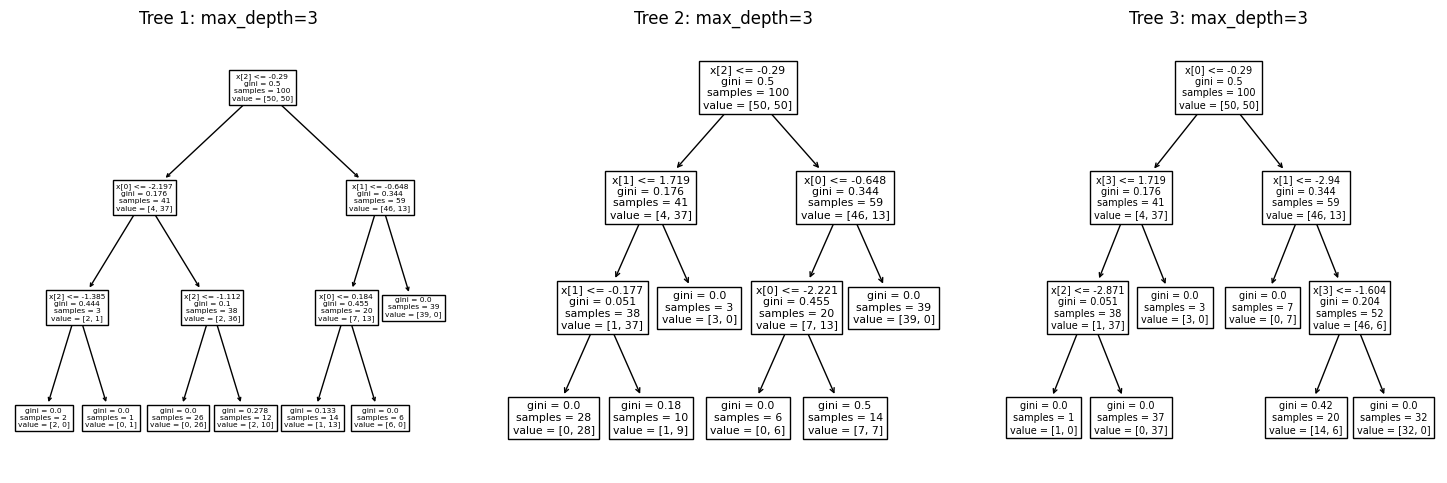

In [177]:

def plot_trees_feature(df, percent, num_trees=3):
    fig, axes = plt.subplots(nrows=1, ncols=num_trees, figsize=(5*num_trees, 5))
    fig.tight_layout()

    for i in range(num_trees):
        train_data = feature_sampling(df, percent)  # Assuming feature_sampling is defined elsewhere
        X_train = train_data.drop('target', axis=1)
        y_train = train_data['target']

        tree = DecisionTreeClassifier(max_depth=3)
        tree.fit(X_train, y_train)

        plot_tree(tree, ax=axes[i])
        axes[i].set_title(f'Tree {i+1}: max_depth=3')

    plt.show()

# Example usage:
# df is your original DataFrame
# percent is the percentage of columns to sample (e.g., 0.8 for 80%)
# num_trees is the number of decision trees to plot
plot_trees_feature(df, 0.8, num_trees=3)

# Training decision tree using combined_sampling

In [212]:
df1_cs = combined_sampling(df,0.5,0.5)
df1_cs.sample(10)

,col5,col2,target
46,-1.393916,-2.036656,1
37,-1.451384,-1.073500,1
98,-1.937155,1.054455,0
71,-1.046615,-1.426480,0
2,-0.284103,-0.225359,0
93,-1.420760,0.630027,0
29,-2.029706,-1.750618,1
76,2.297006,-4.770228,0
15,1.130243,-2.018365,0
67,0.661010,0.139874,0


In [202]:
df2_cs = combined_sampling(df,0.5,0.5)

In [203]:
df3_cs = combined_sampling(df,0.5,0.5)

In [204]:
print(df1_cs.columns)
print(df2_cs.columns)
print(df3_cs.columns)

Index(['col3', 'target', 'col4'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')
Index(['col1', 'col3', 'col4', 'target'], dtype='object')


In [205]:
df3_cs.shape

(50, 4)

In [206]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [207]:
clf1.fit(df1_cs.iloc[:,0:2],df1_cs['target'])
clf2.fit(df2_cs.iloc[:,0:2],df2_cs['target'])
clf3.fit(df3_cs.iloc[:,0:2],df3_cs['target'])

DecisionTreeClassifier()

In [208]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]')]

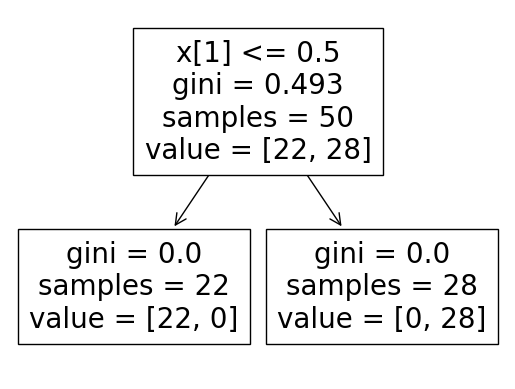

In [209]:
plot_tree(clf1)

[Text(0.4642857142857143, 0.9166666666666666, 'x[1] <= -0.823\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.21428571428571427, 0.75, 'x[0] <= 0.884\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[0] <= 0.384\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[0] <= 0.588\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7142857142857143, 0.75, 'x[0] <= 0.44\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.6428571428571429, 0.5833333333333334, 'x[0] <= -1.378\ngini = 0.191\nsamples = 28\nvalue = [25, 3]'),
 Text(0.5, 0.4166666666666667, 'x[0]

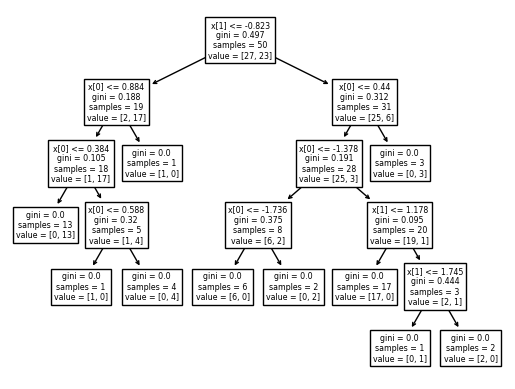

In [210]:
plot_tree(clf2)

[Text(0.5, 0.9, 'x[1] <= -0.19\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3, 0.7, 'x[0] <= -0.812\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.2, 0.5, 'x[0] <= -0.872\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.7, 0.7, 'x[0] <= -2.695\ngini = 0.293\nsamples = 28\nvalue = [23, 5]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'x[0] <= -1.286\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.7, 0.3, 'x[1] <= 1.522\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

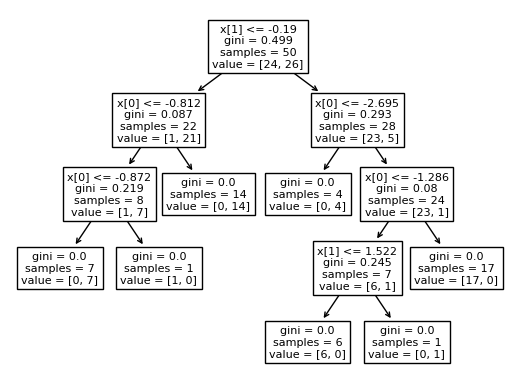

In [211]:
plot_tree(clf3)

In [214]:
clf1.predict(np.array([-1.393916,	-2.036656 ]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [215]:
clf2.predict(np.array([-1.393916,	-2.036656]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [216]:
clf3.predict(np.array([-1.393916,	-2.036656]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

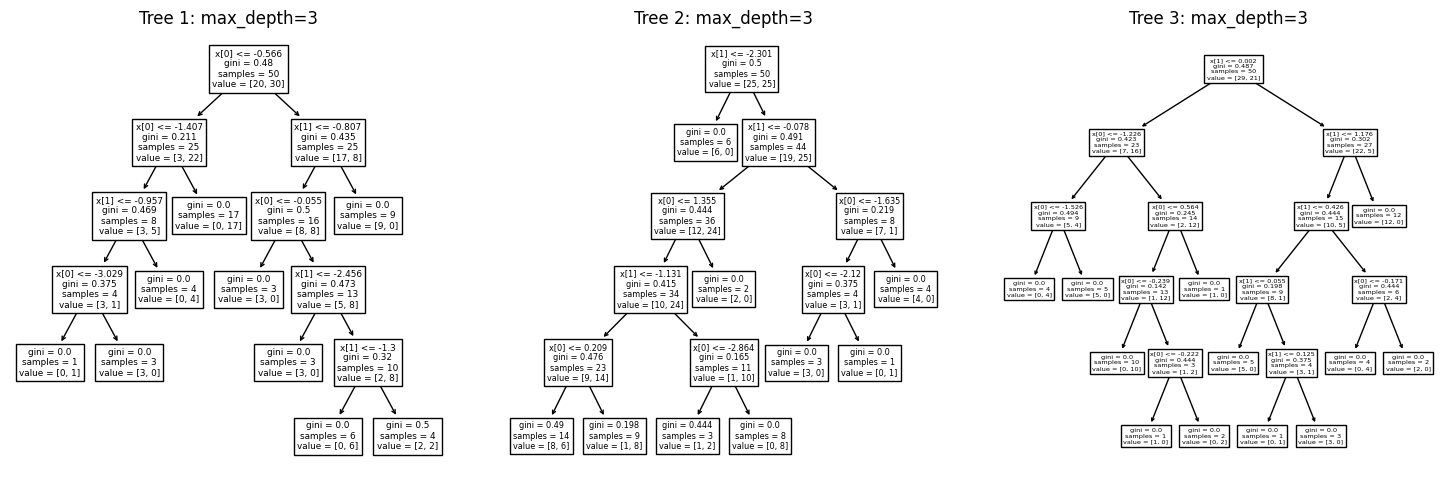

In [218]:

def plot_trees_combined(df, row_percent, col_percent, num_trees=3):
    fig, axes = plt.subplots(nrows=1, ncols=num_trees, figsize=(5*num_trees, 5))
    fig.tight_layout()

    for i in range(num_trees):
        train_data = combined_sampling(df, row_percent, col_percent)
        X_train = train_data.drop('target', axis=1)
        y_train = train_data['target']

        tree = DecisionTreeClassifier(max_depth=5)
        tree.fit(X_train, y_train)

        plot_tree(tree, ax=axes[i])
        axes[i].set_title(f'Tree {i+1}: max_depth=3')

    plt.show()

# Example usage:
# df is your original DataFrame
# row_percent is the percentage of rows to sample (e.g., 0.5 for 50%)
# col_percent is the percentage of columns to sample (e.g., 0.5 for 50%)
# num_trees is the number of decision trees to plot
plot_trees_combined(df, 0.5, 0.5, num_trees=3)
